In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN

In [21]:
## laod imdb dataset
max_features = 5000
max_len = 500
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [22]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [23]:
## inspect sample reviews ans its label
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [24]:
Sample_review=X_train[0]
Sample_label=y_train[0]
print(Sample_review)
print(Sample_label)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [25]:
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [26]:
##paddind sequence
max_len=200
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)



In [27]:
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [28]:
## train a Simple RNN

In [29]:
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(SimpleRNN(64,activation='tanh',dropout=0.3,
    recurrent_dropout=0.3))
model.add(Dense(1,activation='sigmoid'))


In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)

In [31]:
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'], run_eagerly=True)

In [32]:
model.build(input_shape=(None,max_len))

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
## Create an instance for early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [35]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,
          validation_split=0.2,callbacks=[early_stopping]
          )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 573s 917ms/step - accuracy: 0.4953 - loss: 0.7277 - val_accuracy: 0.5330 - val_loss: 0.6898
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 582s 931ms/step - accuracy: 0.5343 - loss: 0.6890 - val_accuracy: 0.5554 - val_loss: 0.6816
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 899ms/step - accuracy: 0.5355 - loss: 0.6855 - val_accuracy: 0.5530 - val_loss: 0.6770
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 898ms/step - accuracy: 0.5613 - loss: 0.6767 - val_accuracy: 0.5782 - val_loss: 0.6721
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 565s 904ms/step - accuracy: 0.5663 - loss: 0.6756 - val_accuracy: 0.5742 - val_loss: 0.6645
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 567s 907ms/step - accuracy: 0.5799 - loss: 0.6664 - val_accuracy: 0.5684 - val_loss: 0.6644
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 566s 905ms/step - accuracy: 0.5938 - loss: 0.6576 - val_accuracy: 0.5832 - val_loss: 0.6566
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 901ms/step - accuracy: 0.5979 -

In [36]:
model.save("movie_review.keras")

In [37]:
model.evaluate(X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 326s 417ms/step - accuracy: 0.5869 - loss: 0.6589


[0.656781792640686, 0.5899999737739563]

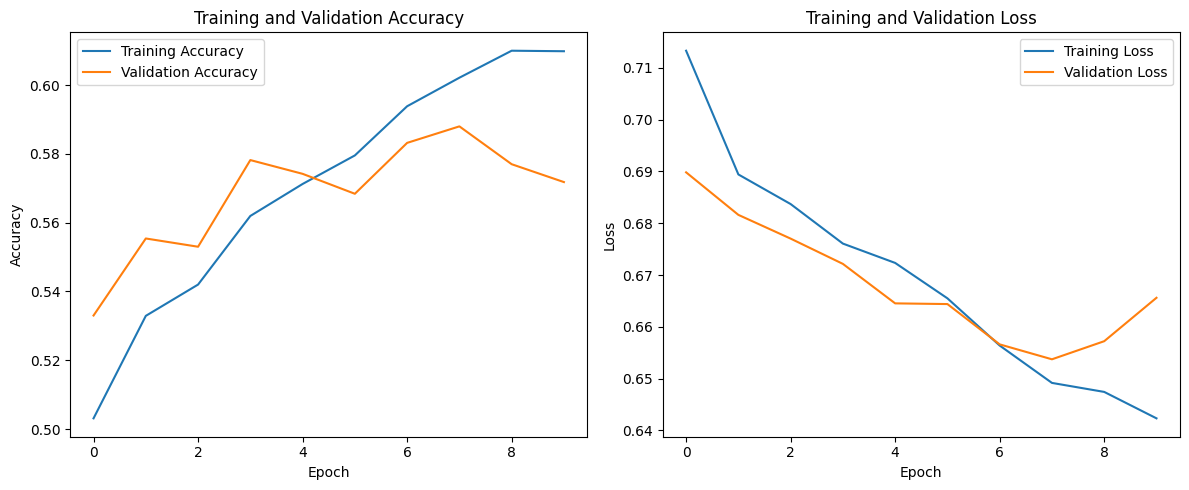

In [39]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()